In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from yellowbrick.classifier import ClassificationReport, ROCAUC, ConfusionMatrix

In [2]:
data = np.genfromtxt("spambase.data", delimiter=',')
X = data[:,:57]
Y = data[:,-1]
#scaler = StandardScaler()
#X = scaler.fit_transform(X)
Xtr, Xte, Ytr, Yte = train_test_split(X, Y, test_size=0.3, shuffle=True, random_state=1)

## Training with 1-nearest-neighbor classifier

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=1)
clf = neigh.fit(Xtr, Ytr) 

In [ ]:
print("training score:\t", clf.score(Xtr,Ytr))
print("test score:\t", clf.score(Xte,Yte))

## Training with k-nearest-neighbor classifier

In [ ]:
k = [1,3,5,7,9,11,13,15,17,19]
train_error = []
test_error = []
cv_error = []
for i in k:
    neigh = KNeighborsClassifier(n_neighbors=i)
    clf = neigh.fit(Xtr, Ytr) 
    train_error.append(1 - clf.score(Xtr,Ytr))
    test_error.append(1 - clf.score(Xte,Yte))
    
kf = KFold(n_splits=5, shuffle=True, random_state=1)
for i in k:
    err = []
    for train_idx, test_idx in kf.split(X):
        Xtr_cv, Xte_cv = X[train_idx], X[test_idx]
        Ytr_cv, Yte_cv = Y[train_idx], Y[test_idx]
        
        clf = KNeighborsClassifier(n_neighbors=i).fit(Xtr_cv,Ytr_cv)
        err.append(1 - clf.score(Xte_cv,Yte_cv))
    cv_error.append(np.mean(err))

In [ ]:
plt.rcParams["figure.figsize"] = (15.0,8.0)
plt.semilogy(k[1:], train_error[1:], label="training error");
plt.semilogy(k[1:], test_error[1:], label="test error");
plt.semilogy(k[1:], cv_error[1:], label="cross validation error");
plt.xticks(k[1:])
plt.xlabel('K neighbors')
plt.ylabel('Error')
plt.legend()
plt.show()

In [ ]:
#print(sorted(enumerate(test_error), key=lambda d:d[1]))
res = sorted(enumerate(test_error), key=lambda d:d[1])[0]
print("At k =", 2 * (res[0]+1) - 1," test error at lowest:", res[1])
res = sorted(enumerate(cv_error), key=lambda d:d[1])[0]
print("At k =", 2 * (res[0]+1) - 1," cross validation error at lowest:", res[1])

## Visualization: Classification Report and ROC,AUC

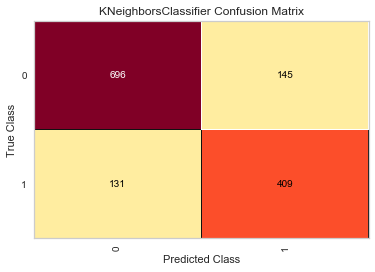

In [3]:
model = KNeighborsClassifier(n_neighbors=1)
cm = ConfusionMatrix(model, classes=[0, 1])
cm.fit(Xtr, Ytr)
cm.score(Xte, Yte)
cm.poof()

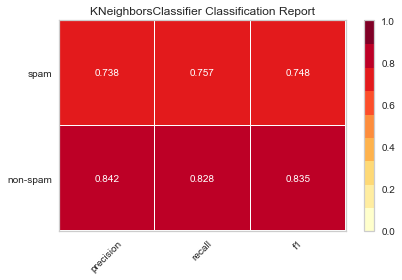

In [4]:
visualizer = ClassificationReport(model, classes=['non-spam', 'spam'])

visualizer.fit(Xtr, Ytr)
visualizer.score(Xte, Yte)
visualizer.poof()

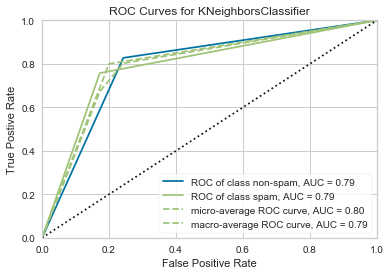

In [5]:
visualizer = ROCAUC(model, classes=['non-spam', 'spam'])
visualizer.fit(Xtr, Ytr)
visualizer.score(Xte, Yte)
visualizer.poof()

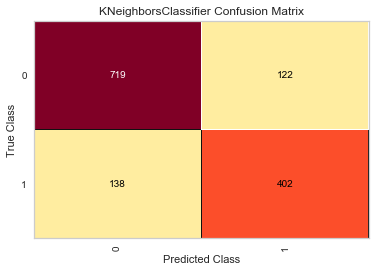

In [6]:
model = KNeighborsClassifier(n_neighbors=3)
cm = ConfusionMatrix(model, classes=[0, 1])
cm.fit(Xtr, Ytr)
cm.score(Xte, Yte)
cm.poof()

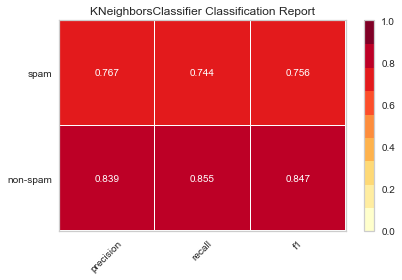

In [7]:
visualizer = ClassificationReport(model, classes=['non-spam', 'spam'])

visualizer.fit(Xtr, Ytr)
visualizer.score(Xte, Yte)
visualizer.poof()

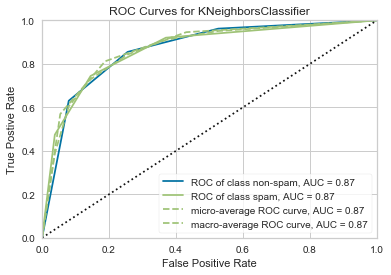

In [8]:
visualizer = ROCAUC(model, classes=['non-spam', 'spam'])
visualizer.fit(Xtr, Ytr)
visualizer.score(Xte, Yte)
visualizer.poof()

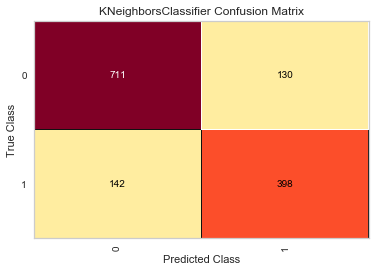

In [9]:
model = KNeighborsClassifier()
cm = ConfusionMatrix(model, classes=[0, 1])
cm.fit(Xtr, Ytr)
cm.score(Xte, Yte)
cm.poof()

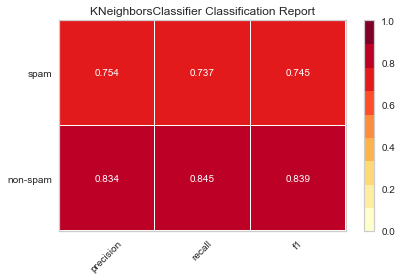

In [10]:
visualizer = ClassificationReport(model, classes=['non-spam', 'spam'])

visualizer.fit(Xtr, Ytr)
visualizer.score(Xte, Yte)
visualizer.poof()

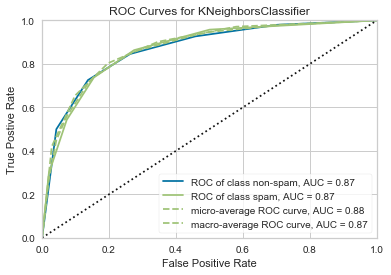

In [11]:
visualizer = ROCAUC(model, classes=['non-spam', 'spam'])
visualizer.fit(Xtr, Ytr)
visualizer.score(Xte, Yte)
visualizer.poof()